In [212]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [213]:
def get_data(name):
    temp = []
    for line in open(name):
        parts = np.array(line.strip().split(' ')).astype(float)
        #print(parts)
        temp.append(parts.flatten())
    temp = np.array(temp).reshape(-1,1)
    temp = temp.flatten()

    return temp

## Read Data From file

In [214]:
residual_newton = get_data('residual_newton.txt')
residual_bisection = get_data('residual_bisection.txt')
residual_secent = get_data('residual_secent.txt')
p_n = get_data('pressure_newton.txt')
p_s = get_data('pressure_secent.txt')
p_b = get_data('pressure_bisection.txt')

To plot the function

In [215]:
def plot(i):    
    plt.loglog(np.linspace(0,len(residual_newton[i]),len(residual_newton[i])),residual_newton[i],label = 'Newton')
    plt.loglog(np.linspace(0,len(residual_bisection[i]),len(residual_bisection[i])),residual_bisection[i],label = 'Bisection')
    plt.loglog(np.linspace(0,len(residual_secent[i]),len(residual_secent[i])),residual_secent[i],label = 'Secent')
    plt.title("For case :"  + str(i+1))
    plt.xlabel("Number of Iterations")
    plt.ylabel("Residual")
    plt.legend()
    plt.savefig(str(i))

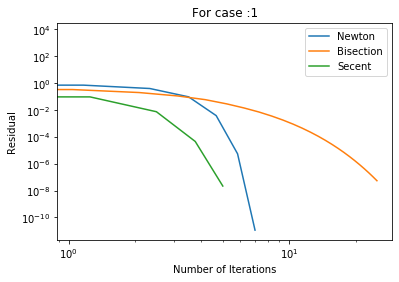

In [216]:
plot(0)

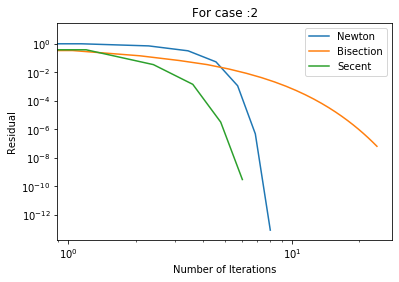

In [217]:
plot(1)


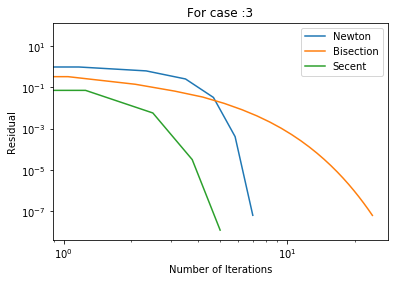

In [218]:
plot(2)

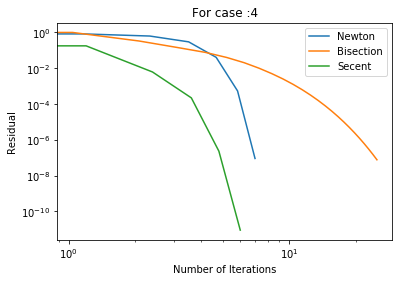

In [219]:
plot(3)

#### For Convergence

In [220]:
def convergence(data):
    temp = [0]*len(data)
    convergence = [0]*len(data)
    for i in range(len(data)):
        temp[i] = np.unique(data[i])
        first_term = temp[i][-1] - temp[i][-2]
        second_term = temp[i][-2] - temp[i][-3]
        third_term = second_term
        fourth_term = temp[i][-3] - temp[i][-4]
        convergence[i] =  abs(np.log(abs(first_term/second_term)) / np.log(abs(third_term/fourth_term)))
    convergence = np.array(convergence)
    #print(convergence)
    return convergence


In [221]:
CON = np.array((convergence(p_b),convergence(p_s),convergence(p_n)))

In [222]:
df = pd.DataFrame(data = CON,index=["Bisection","Secent","Newton"],columns =["Case 1","Case 2","Case 3","Case 4"])

In [223]:
df

,Case 1,Case 2,Case 3,Case 4
Bisection,0.235587,1.010484,0.963777,0.964924
Secent,0.494484,0.648635,2.058983,0.974643
Newton,1.978857,2.227796,2.155468,2.209649
